## Observations and Insights 

In [409]:
%matplotlib notebook
%config IPcompiler.greedy=True

In [410]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [411]:
# print mouse_metadata
mouse_metadata.shape

(249, 5)

In [412]:
#print study_results
study_results.shape

(1893, 4)

In [413]:
# Combine the data into a single dataset using Mouse ID
#used an outer join so that no data is lost
df_mouseData = mouse_metadata.merge(study_results, on= "Mouse ID")
df_mouseData.shape

(1893, 8)

In [414]:
# Checking the number of mice in the DataFrame.
mouseCount=len(df_mouseData["Mouse ID"].unique())
mouseCount

249

In [415]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
groupCount_MouseID_Timepoint = df_mouseData.groupby(["Mouse ID", "Timepoint"]).count()
groupCount_MouseID_Timepoint = groupCount_MouseID_Timepoint[["Drug Regimen"]]
groupCount_MouseID_Timepoint.rename(columns={"Drug Regimen": "No of Duplicate enties"}, inplace=True)
groupCount_MouseID_Timepoint= groupCount_MouseID_Timepoint[groupCount_MouseID_Timepoint["No of Duplicate enties"]>1]
groupCount_MouseID_Timepoint

No of Duplicate enties
Mouse ID Timepoint                        
g989     0                               2
         5                               2
         10                              2
         15                              2
         20                              2

In [416]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseID_data= df_mouseData[df_mouseData["Mouse ID"]=="g989"]
duplicateMouseID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [417]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleanData = df_mouseData[df_mouseData["Mouse ID"]!="g989"]
#13 rows deleted
df_cleanData.shape

(1880, 8)

In [418]:
# Checking the number of mice in the clean DataFrame.
df_cleanData["Mouse ID"].count()

1880

## Summary Statistics

In [419]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
#get the columns needed the Drug Regimen and Tumor Volume
df_TumorVolume = df_cleanData[["Drug Regimen","Tumor Volume (mm3)"]]
df_TumorVolume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [420]:
#Create a group by object by each Drug Regimen
groupDrug = df_TumorVolume.groupby("Drug Regimen")
#Create a df with the mean to which other series will be added
df_SummaryStats = groupDrug.mean()
df_SummaryStats.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)
df_SummaryStats

,Average Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [421]:
#Calculate Series for Median and add to df_SummaryStats
df_SummaryStats['Median Tumor Volume (mm3)'] = groupDrug["Tumor Volume (mm3)"].median()
#Calculate Series for Variance and add to df_SummaryStats
df_SummaryStats['Variance Tumor Volume (mm3)'] = groupDrug["Tumor Volume (mm3)"].var()
#Calculate Series for standard deviation and add to df_SummaryStats
df_SummaryStats['Standard deviation Tumor Volume (mm3)'] = groupDrug["Tumor Volume (mm3)"].std()
#Calculate Series for sem and add to df_SummaryStats
df_SummaryStats['SEM of Tumor Volume (mm3)'] = groupDrug["Tumor Volume (mm3)"].sem()
df_SummaryStats

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard deviation Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [422]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
df_SummaryStats2 = df_TumorVolume.groupby("Drug Regimen").apply(lambda x:pd.DataFrame({
    "Mean":x.mean(),"Median": x.median(), "Variance": x.var(), "std": x.std(), "SEM":x.sem()}))
df_SummaryStats2

,,Mean,Median,Variance,std,SEM
Drug Regimen,,,,,,
Capomulin,Tumor Volume (mm3),40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Tumor Volume (mm3),52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Tumor Volume (mm3),52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Tumor Volume (mm3),55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Tumor Volume (mm3),54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Tumor Volume (mm3),54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Tumor Volume (mm3),52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Tumor Volume (mm3),40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Tumor Volume (mm3),54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Generate A Barplot for number of mice for each treatment throuout the course of the study:

Using Pandas and DataFrames

In [423]:
# Generate a bar plot showing the number of mice for each treatment throughout the course of the study using pandas.
#Prepare df for plot: Take columns needed
df_mouseCountPerDrug = df_mouseData[["Mouse ID", "Drug Regimen"]]
df_mouseCountPerDrug= df_mouseCountPerDrug.groupby(["Drug Regimen"]).count()
df_mouseCountPerDrug.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
df_mouseCountPerDrug.reset_index(inplace=True)
df_mouseCountPerDrug.head()

,Drug Regimen,Mouse Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


<IPython.core.display.Javascript object>


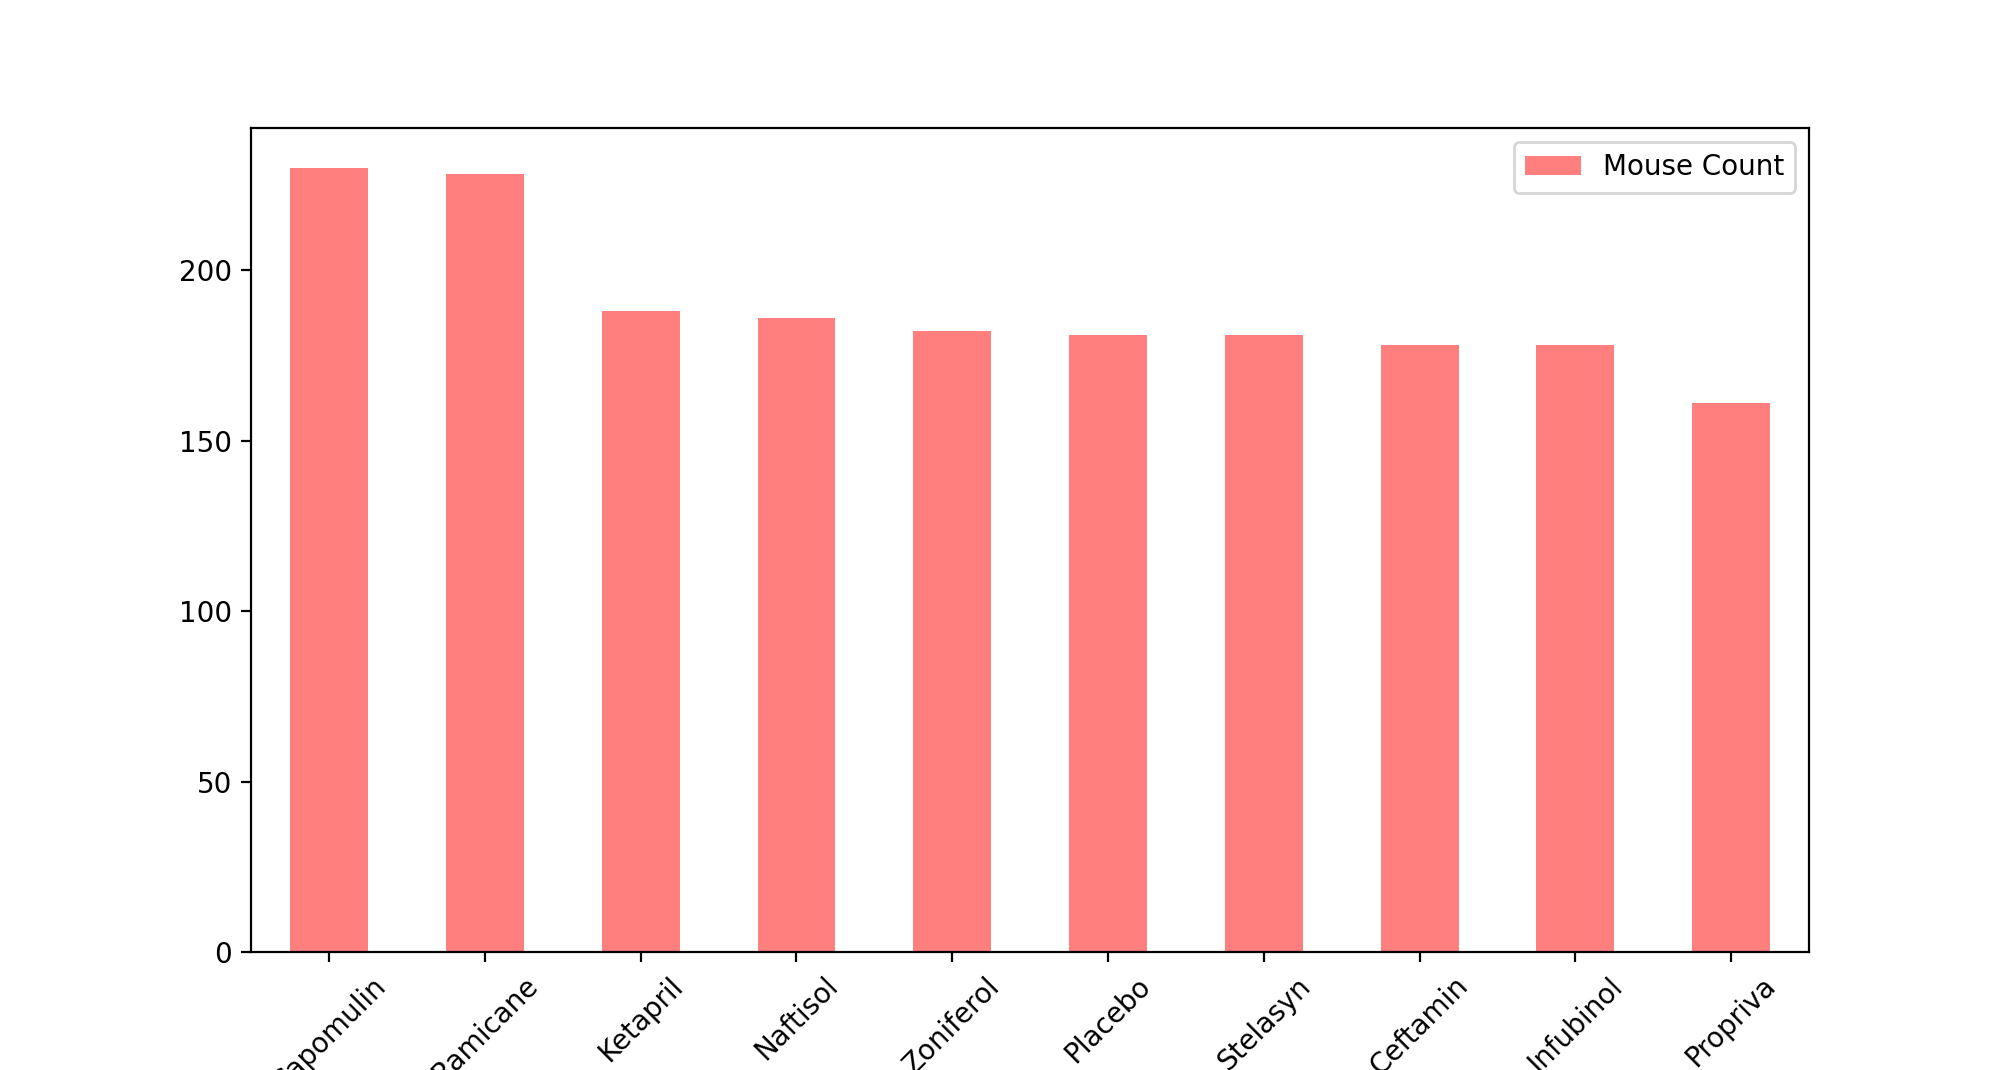

In [428]:
#Generate bar plot using 
#sorting values because series sorts values by default ad we will be comparing plot from DataFrame to the plot from series
df_mouseCountPerDrug.sort_values(by="Mouse Count", inplace=True, ascending=False)
df_mouseCountPerDrug.plot.bar(x='Drug Regimen', y='Mouse Count', rot=45, color='r', alpha=0.5, figsize=(10,5))


Using Pandas and Series

In [429]:
#Generate Series
series_mousePerDrug = df_mouseData["Drug Regimen"].value_counts()
series_mousePerDrug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


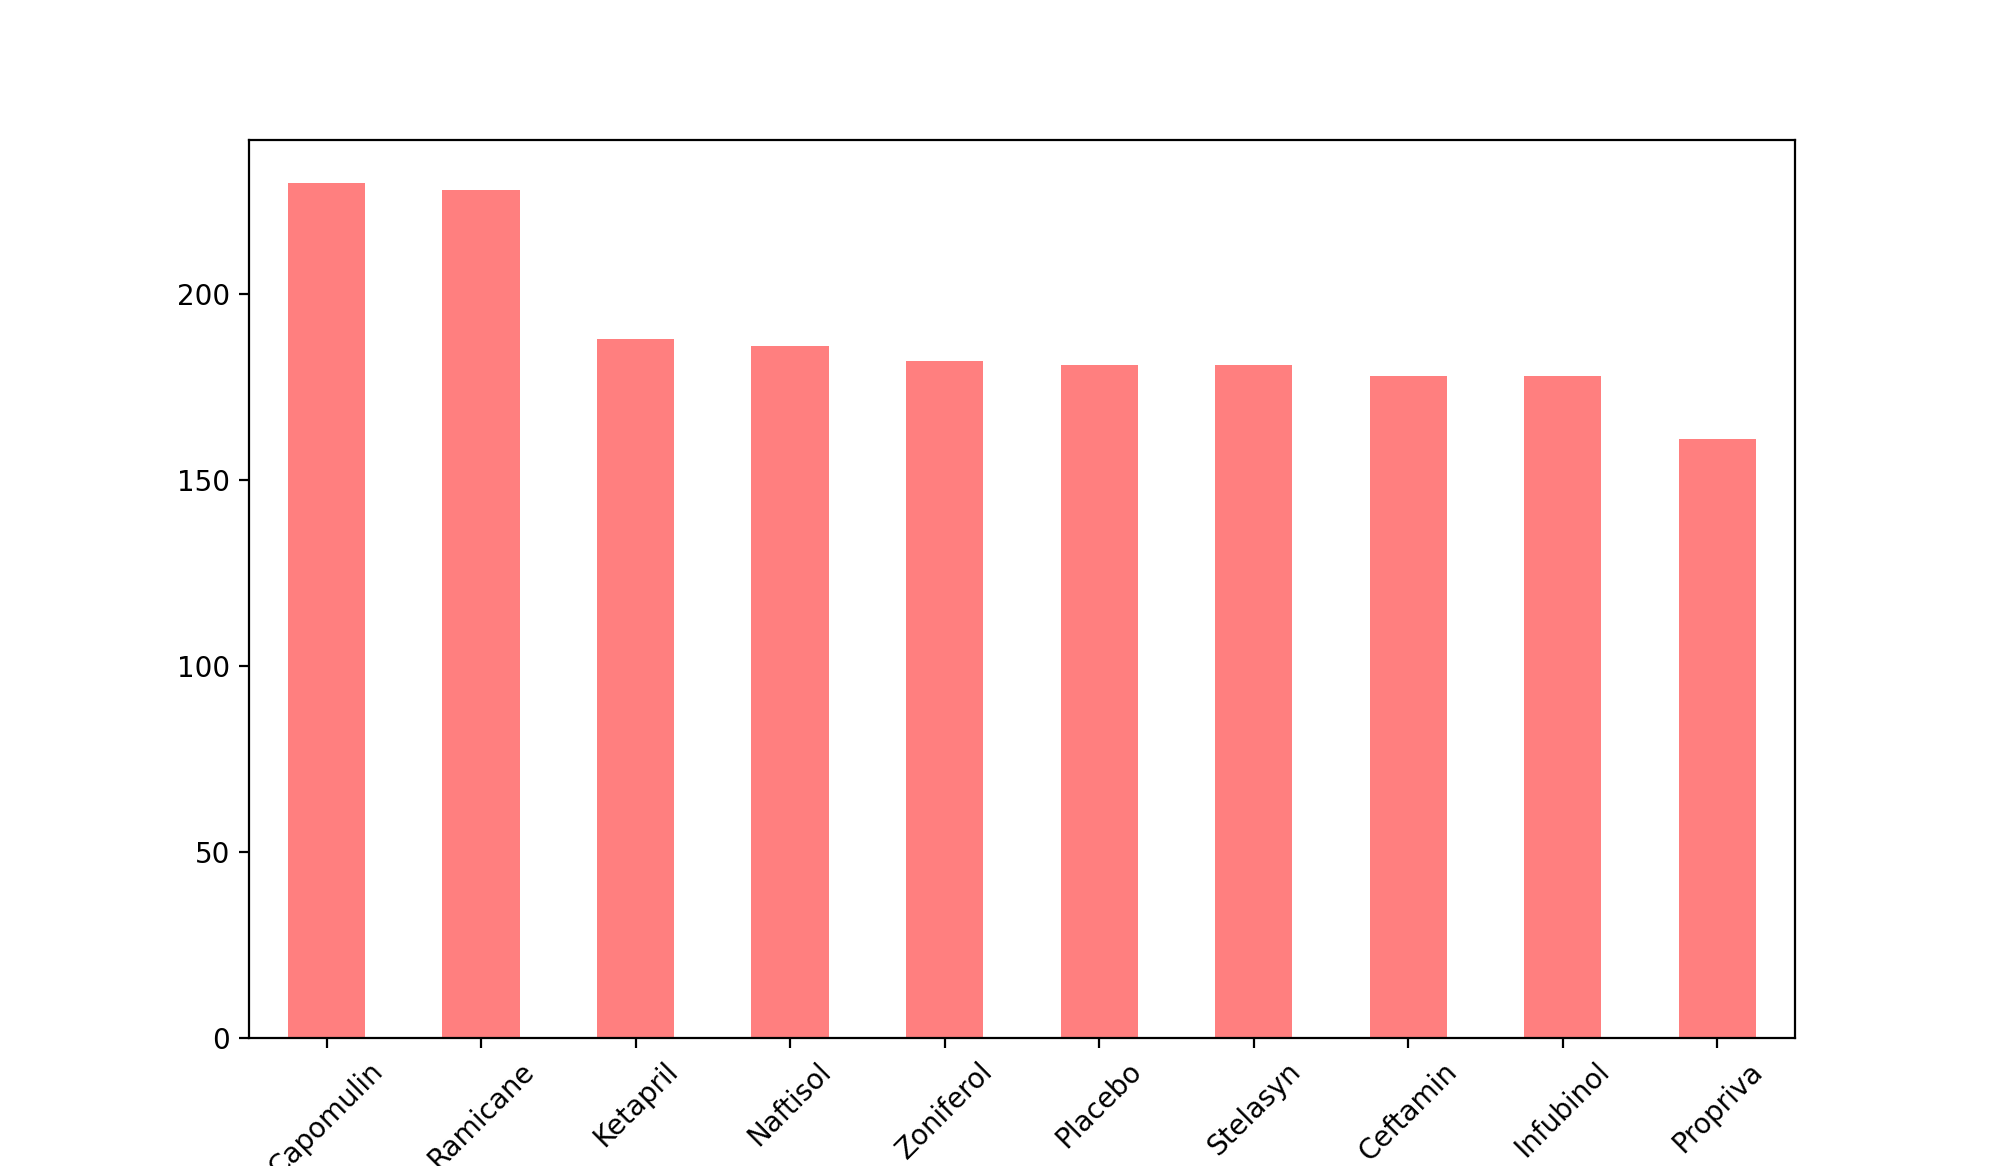

In [430]:
#Plot bar graph with series
series_mousePerDrug.plot(kind='bar', rot=45, figsize=(10,5), color='r', alpha=0.5)
#plt.show()

Using pyplot and DataFrame

<IPython.core.display.Javascript object>


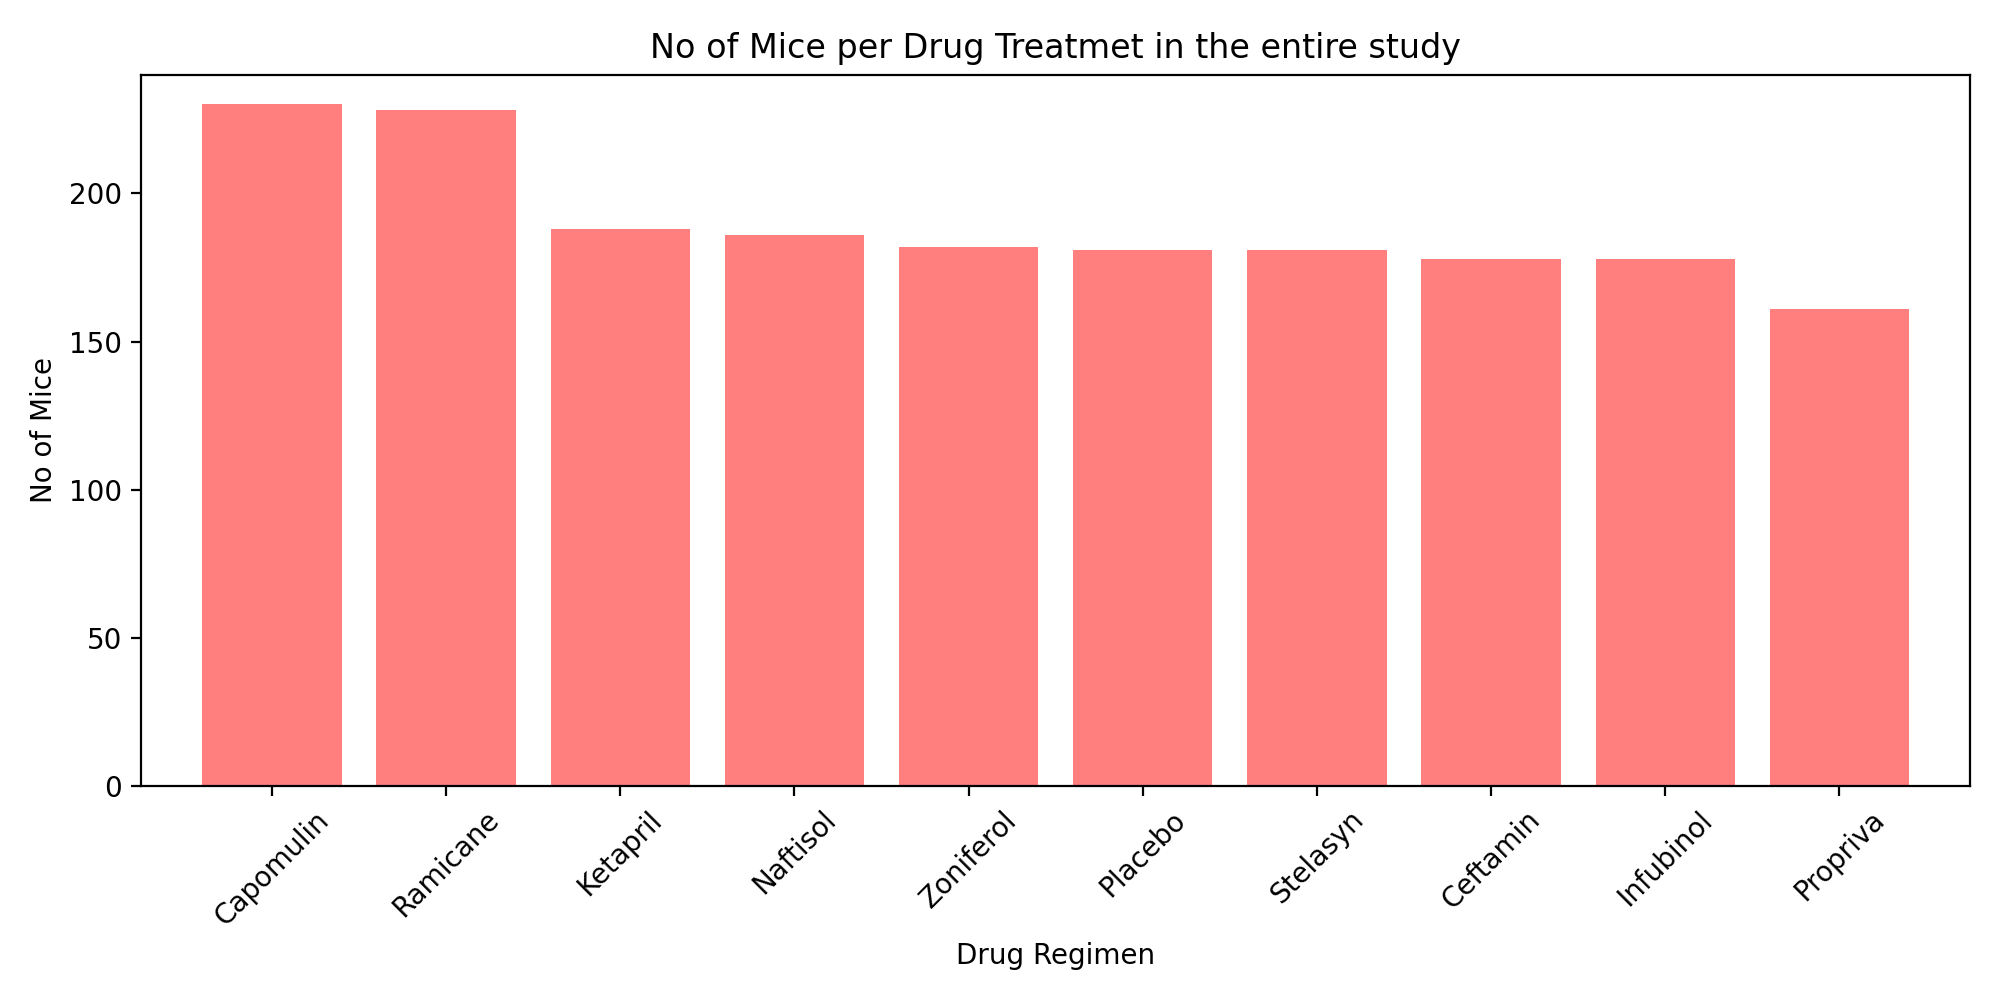

In [431]:
# Generate a bar plot showing the number of mice per for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,5))
plt.bar(df_mouseCountPerDrug["Drug Regimen"], df_mouseCountPerDrug["Mouse Count"], color='r', alpha=0.50)
plt.xlabel("Drug Regimen")
plt.ylabel("No of Mice")
plt.title("No of Mice per Drug Treatmet in the entire study")
plt.ylim(0, df_mouseCountPerDrug["Mouse Count"].max()+10)
plt.xlim(-0.75, len(df_mouseCountPerDrug["Drug Regimen"])-0.25)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

Using pyplot and series

<IPython.core.display.Javascript object>


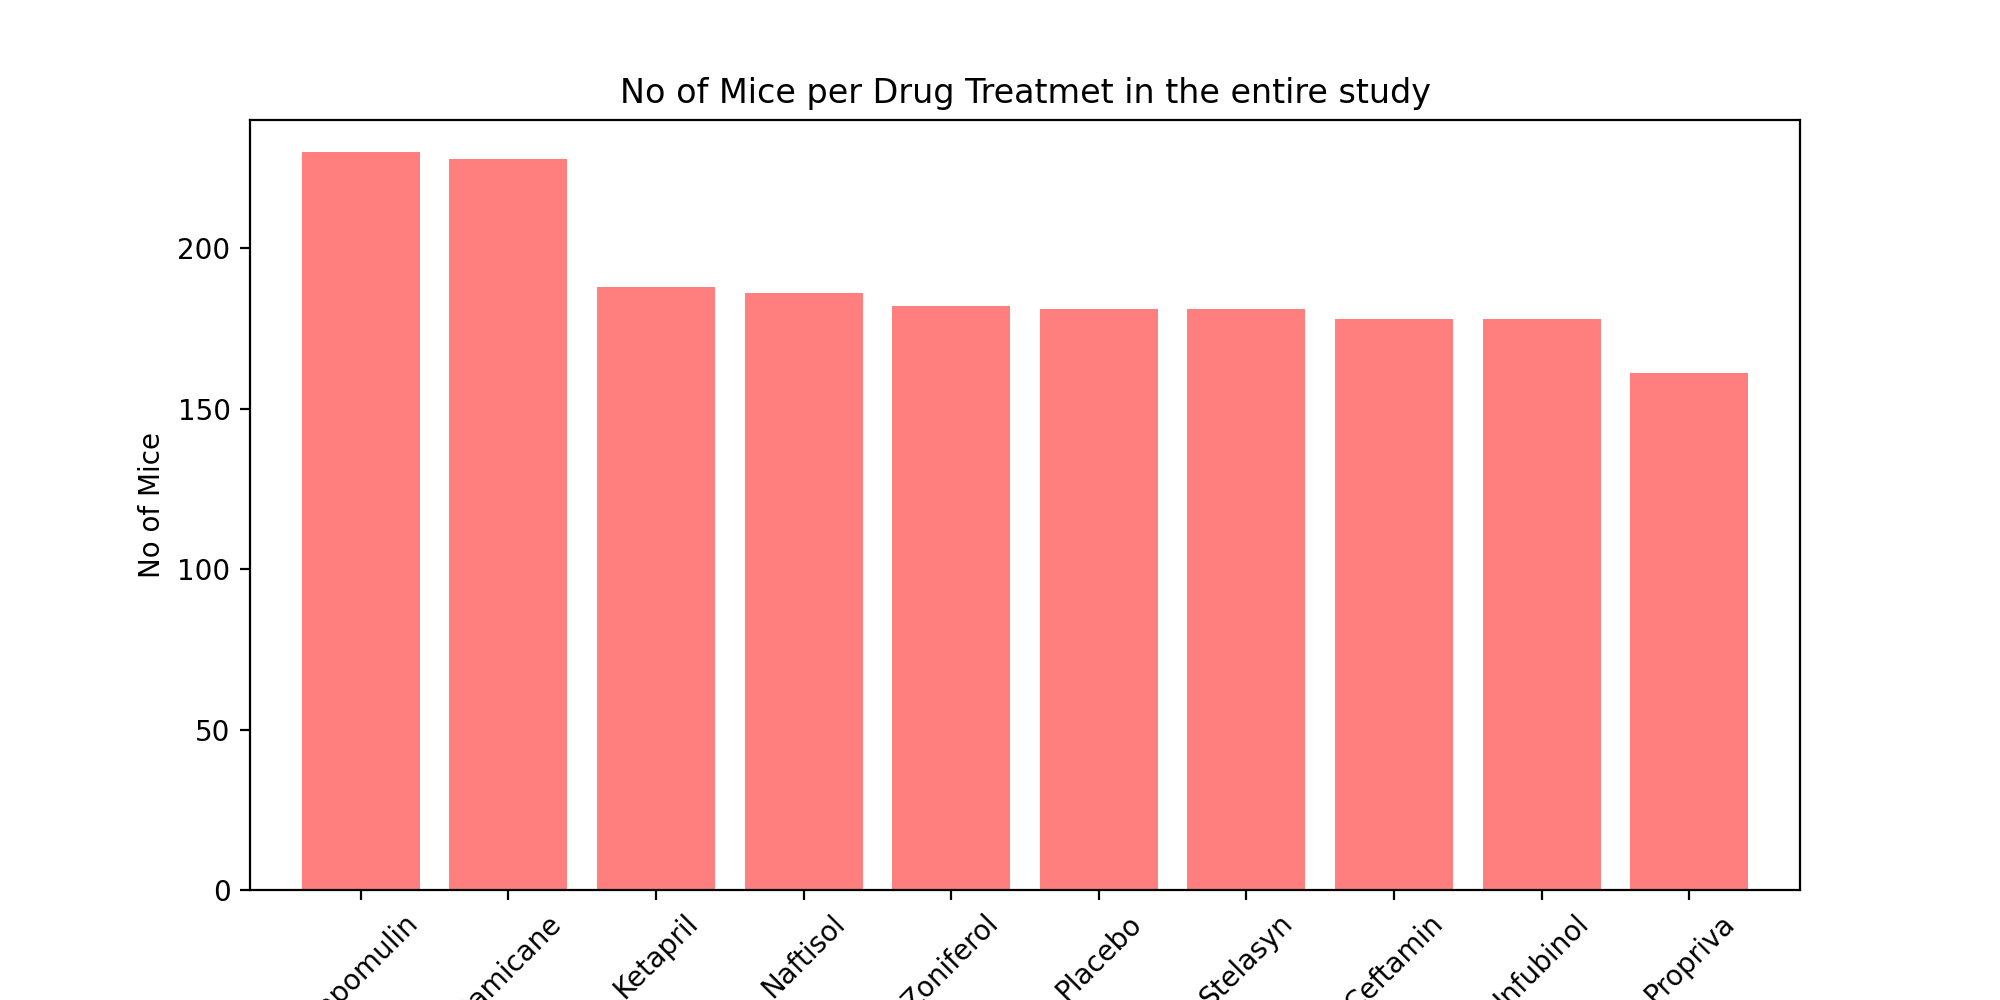

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

In [432]:
plt.figure(figsize=(10,5))
plt.bar(series_mousePerDrug.index, series_mousePerDrug, color='r', alpha=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("No of Mice")
plt.title("No of Mice per Drug Treatmet in the entire study")
plt.ylim(0, df_mouseCountPerDrug["Mouse Count"].max()+10)
plt.xlim(-0.75, len(df_mouseCountPerDrug["Drug Regimen"])-0.25)
plt.xticks(rotation=45)
#plt.show()

## Pie Plots

In [433]:
#Prpare Df by taking the required columns only from the data frame with no duplicates
df_genderDistribution = df_cleanData[["Mouse ID", "Sex"]]
df_genderDistribution = df_genderDistribution.groupby("Sex").count()
df_genderDistribution.rename(columns={"Mouse ID": "Mouse Count"}, inplace=True)
#sort the dataframe by values
df_genderDistribution.sort_values(by="Mouse Count",inplace=True, ascending=False)
#create list of color
colors=['skyblue', 'lightcoral']
#explode for spacing between slices
explode=[0,0.1]
df_genderDistribution.head()

,Mouse Count
Sex,
Male,958
Female,922


Generating the Pie Chart using Pandas and a DataFrame

<IPython.core.display.Javascript object>


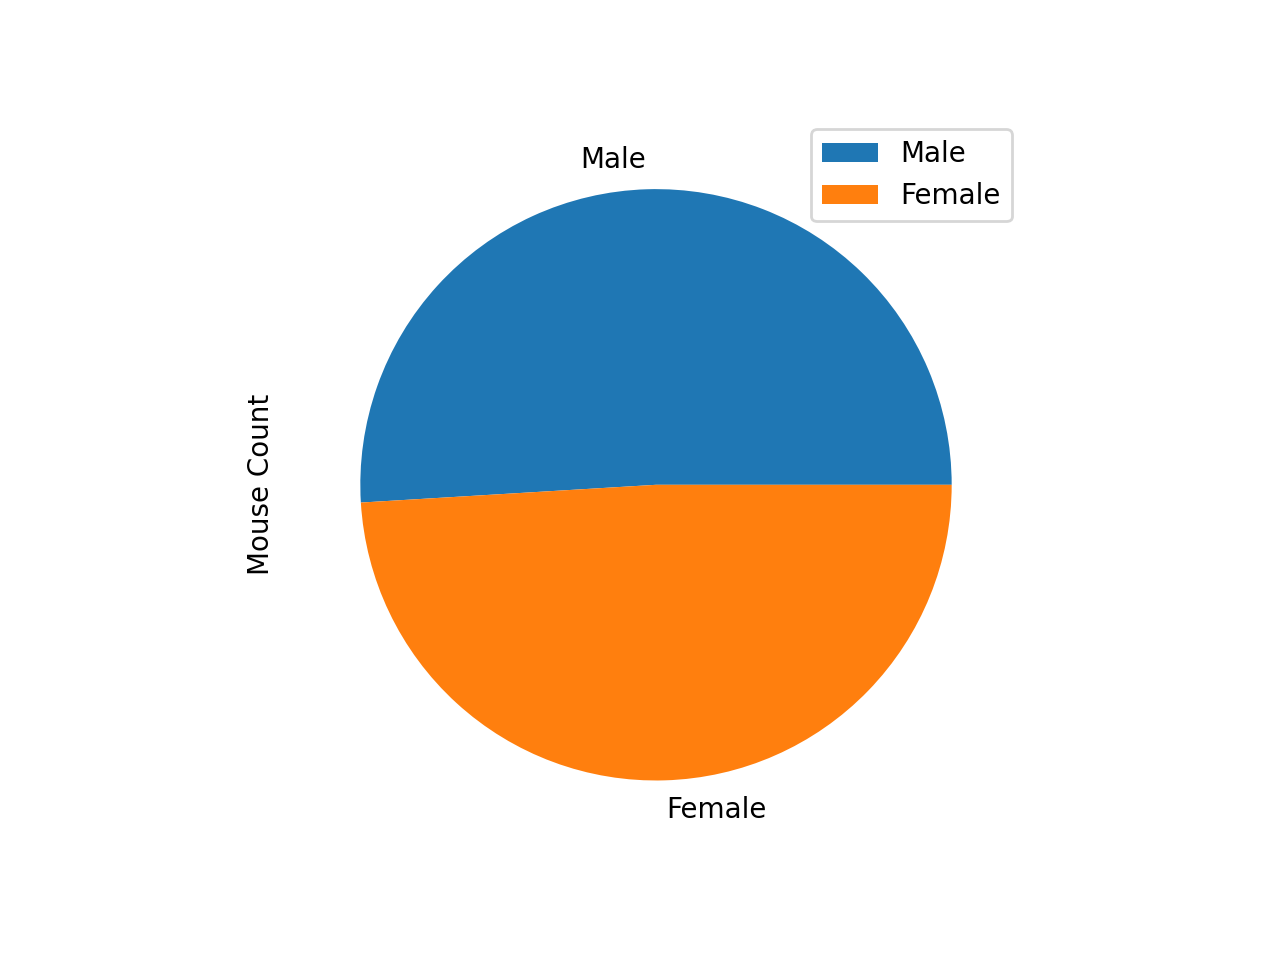

In [437]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_genderDistribution.plot.pie(y="Mouse Count", labels=df_genderDistribution.index)

Generating the Pie Chart using Pandas and a Series

<IPython.core.display.Javascript object>


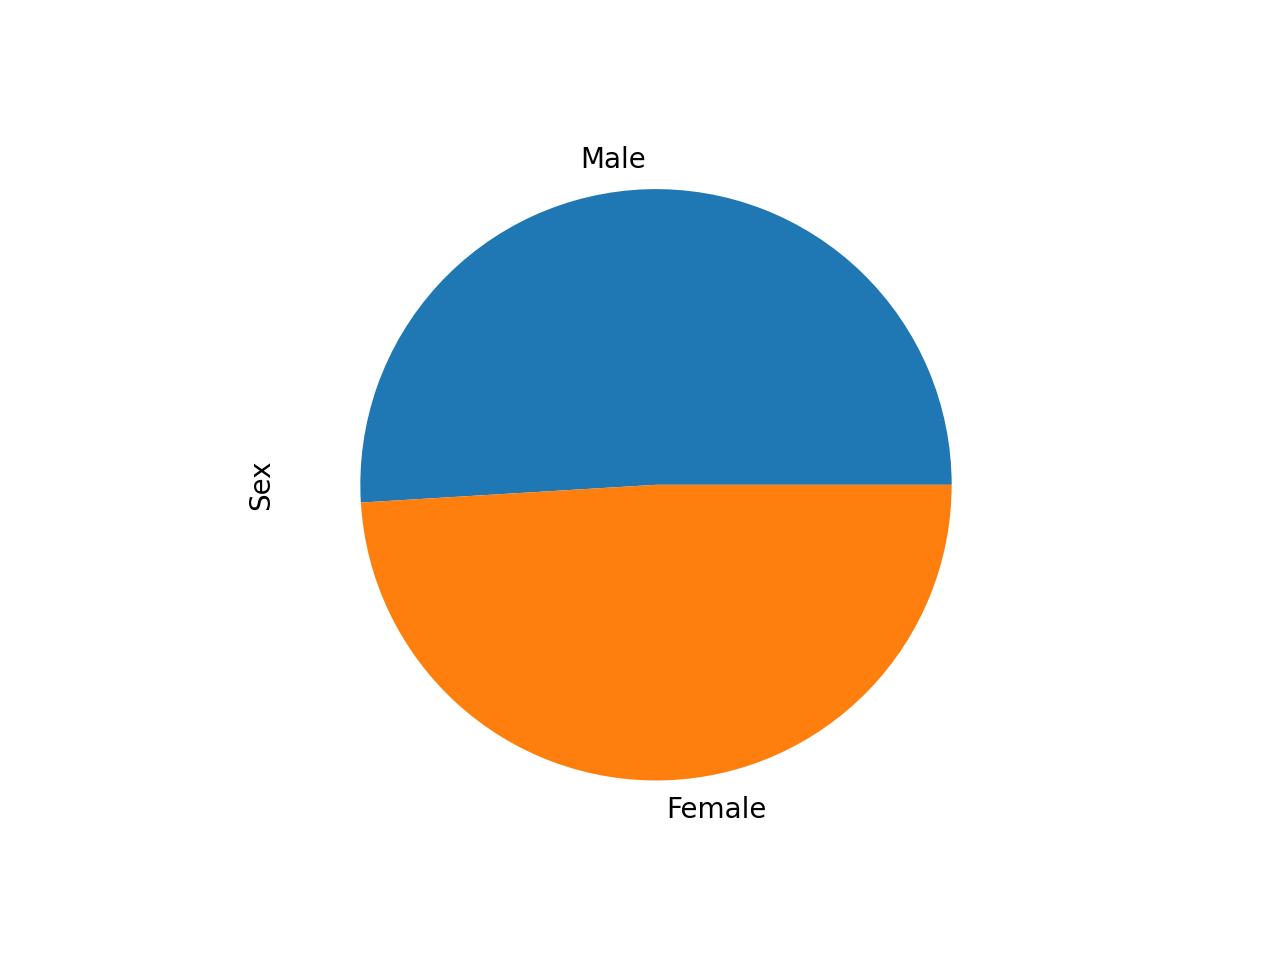

In [438]:
#Create a series
series_genderDistribution = df_cleanData["Sex"].value_counts()
#Plot series using pandas
series_genderDistribution.plot(kind="pie")

Generating the Pie chart using Matplotlib.pyplot and a DataFrame

<IPython.core.display.Javascript object>


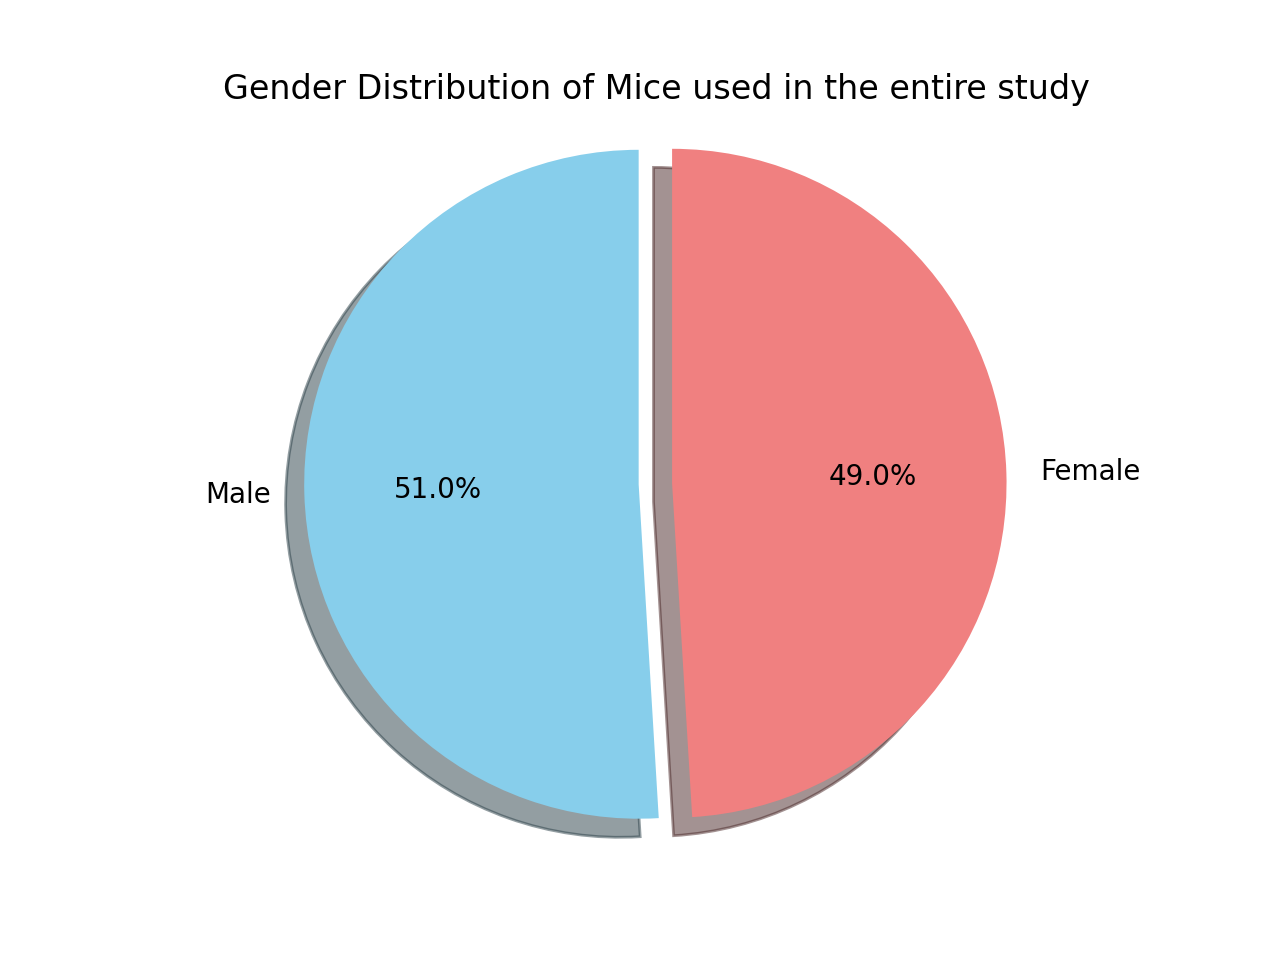

(-1.1091177556002698,
 1.2128639238082213,
 -1.106700641755685,
 1.1034697461867102)

In [439]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_genderDistribution["Mouse Count"], labels=df_genderDistribution.index, colors=colors, explode=explode,
       shadow=True, autopct="%1.1f%%", startangle=90)
plt.title("Gender Distribution of Mice used in the entire study")
plt.axis("equal")

Generating the Pie chart using Matplotlib.pyplot and a Series

<IPython.core.display.Javascript object>


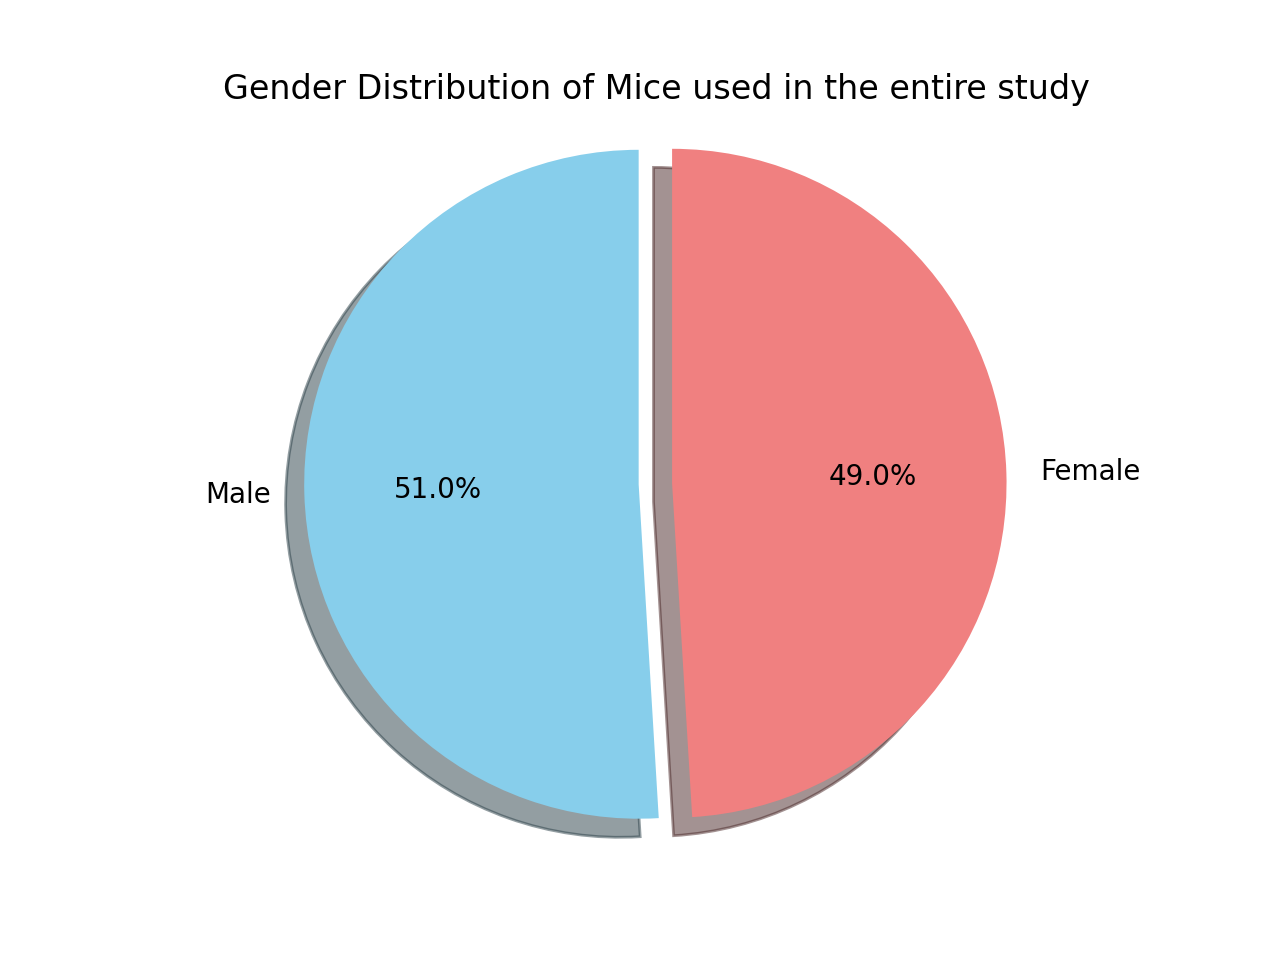

(-1.1091177556002698,
 1.2128639238082213,
 -1.106700641755685,
 1.1034697461867102)

In [440]:
plt.pie(series_genderDistribution, labels=series_genderDistribution.index, colors=colors
        , shadow=True, autopct="%1.1f%%", explode=explode, startangle=90)
plt.title("Gender Distribution of Mice used in the entire study")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [441]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Take the columns we need
df_top4Drugs= df_cleanData[["Drug Regimen", "Tumor Volume (mm3)"]]
df_top4Drugs_describe= df_top4Drugs.groupby("Drug Regimen").apply(lambda x: x.describe().transpose())
df_top4Drugs_describe


,,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,,
Capomulin,Tumor Volume (mm3),230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,Tumor Volume (mm3),178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,Tumor Volume (mm3),178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,Tumor Volume (mm3),188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,Tumor Volume (mm3),186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,Tumor Volume (mm3),181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,Tumor Volume (mm3),148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,Tumor Volume (mm3),228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,Tumor Volume (mm3),181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [442]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_Capomulin= df_cleanData[df_cleanMouseData["Drug Regimen"]=="Capomulin"]
df_Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [443]:
#Lets select the mouse that has the highest numeber of readings and therefor has more 
#timepoint values that can be used as x_axis
df_Capomulin["Mouse ID"].value_counts()

g288    10
i557    10
g316    10
b128    10
w914    10
j119    10
u364    10
m601    10
m957    10
r554    10
i738    10
r944    10
l509    10
y793    10
b742    10
v923    10
s185    10
x401    10
l897    10
t565    10
s710    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


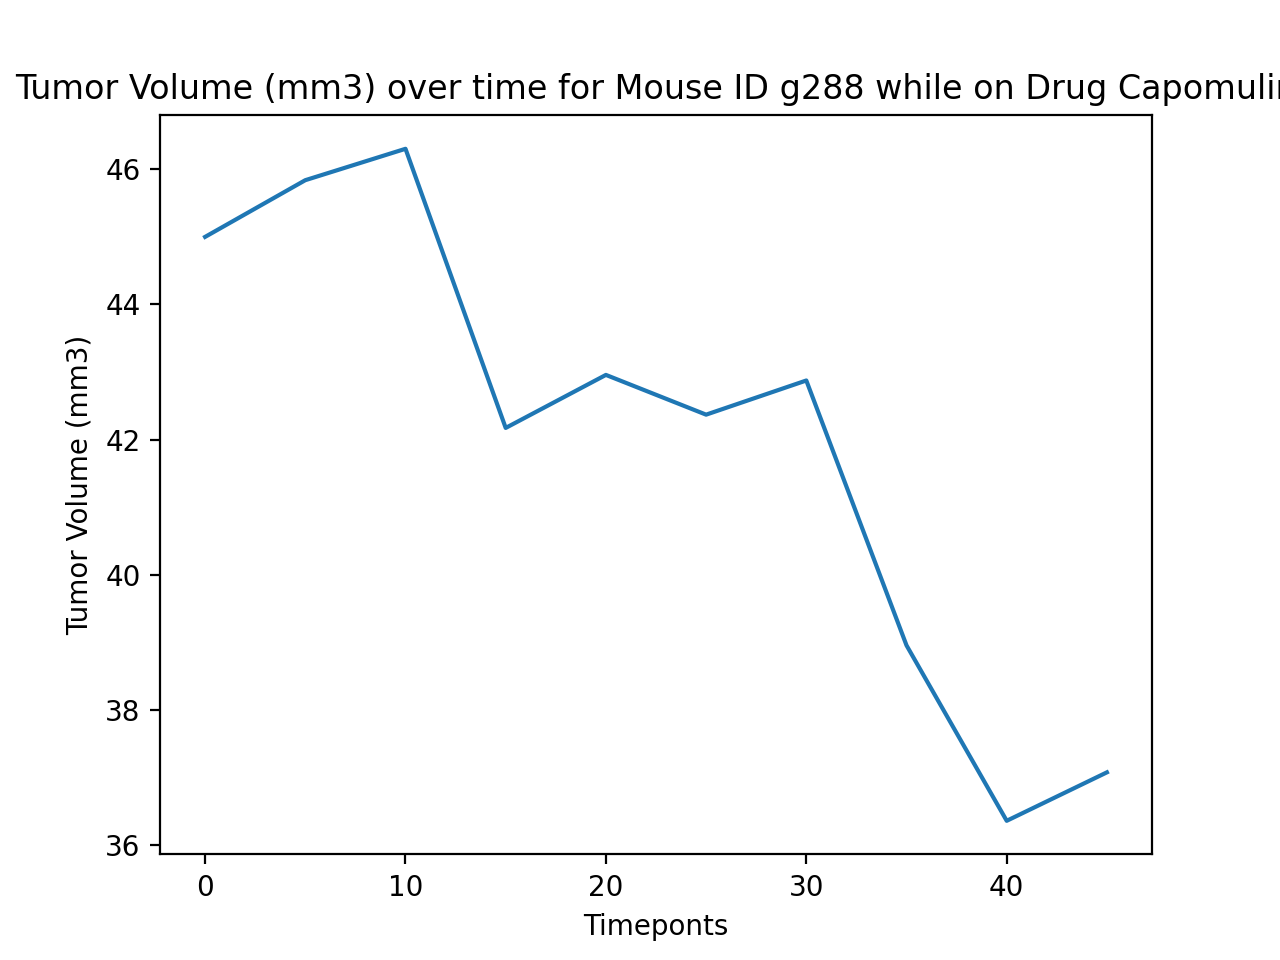

Text(0, 0.5, 'Tumor Volume (mm3)')

In [444]:
#Get data for and Plot results for Mouse ID g288
df_g288=df_Capomulin[df_Capomulin["Mouse ID"]=="g288"][["Timepoint","Tumor Volume (mm3)"]]
plt.plot(df_g288["Timepoint"], df_g288["Tumor Volume (mm3)"])
plt.title("Tumor Volume (mm3) over time for Mouse ID g288 while on Drug Capomulin")
plt.xlabel("Timeponts")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


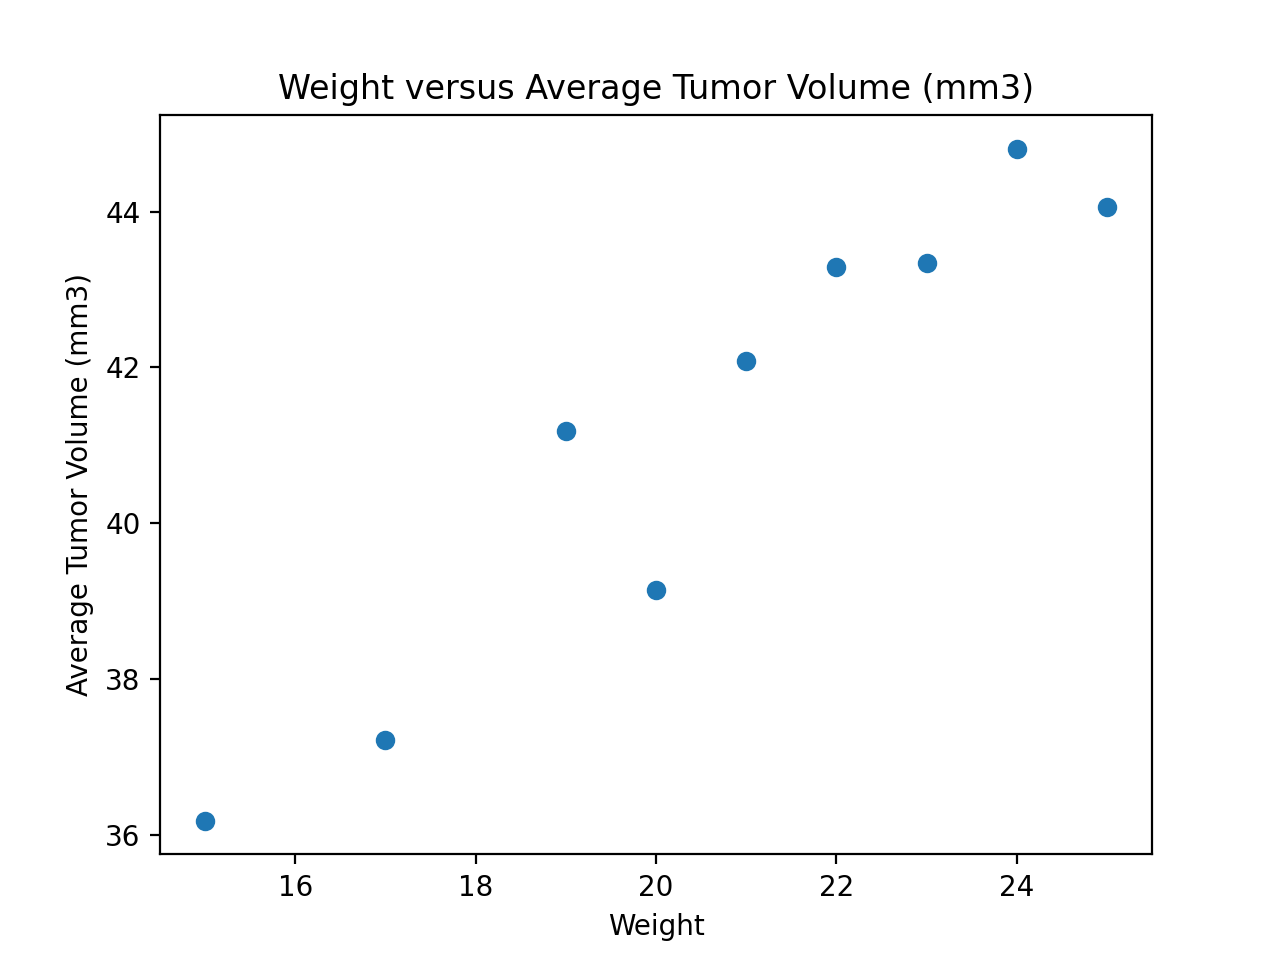

Text(0.5, 1.0, 'Weight versus Average Tumor Volume (mm3)')

In [456]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_avgTumorVolume_Caomulin = df_Capomulin[["Weight (g)", "Tumor Volume (mm3)"]].groupby("Weight (g)").mean()
weight_avgTumorVolume_Caomulin.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)
plt.scatter(weight_avgTumorVolume_Caomulin.index, weight_avgTumorVolume_Caomulin["Average Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight versus Average Tumor Volume (mm3)")

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
